In [1]:
import glob
import pandas as pd
import csv
import os

def get_model_config(name, file):
    msd, encoder, enriched, embs, size = name.split("-")
    return {"MSD": msd, "Encoder": encoder, "Embedder": embs, "Size": size, "Corpus": os.path.basename(file).split(".")[0]}
    
merged_files = []
for file in glob.glob("csv_dumps/*.csv"):
    with open(file) as f:
        r = csv.DictReader(f)
        for row in r:
            merged_files.append({**get_model_config(row["name"], file), **row})
        columns = r.fieldnames
          

In [2]:
df = pd.DataFrame(merged_files)

In [3]:
from IPython.core.display import display, HTML

for col in ["precision-positive", "fscore-positive", "recall-positive"]:
    df[col] = df[col].astype(float)

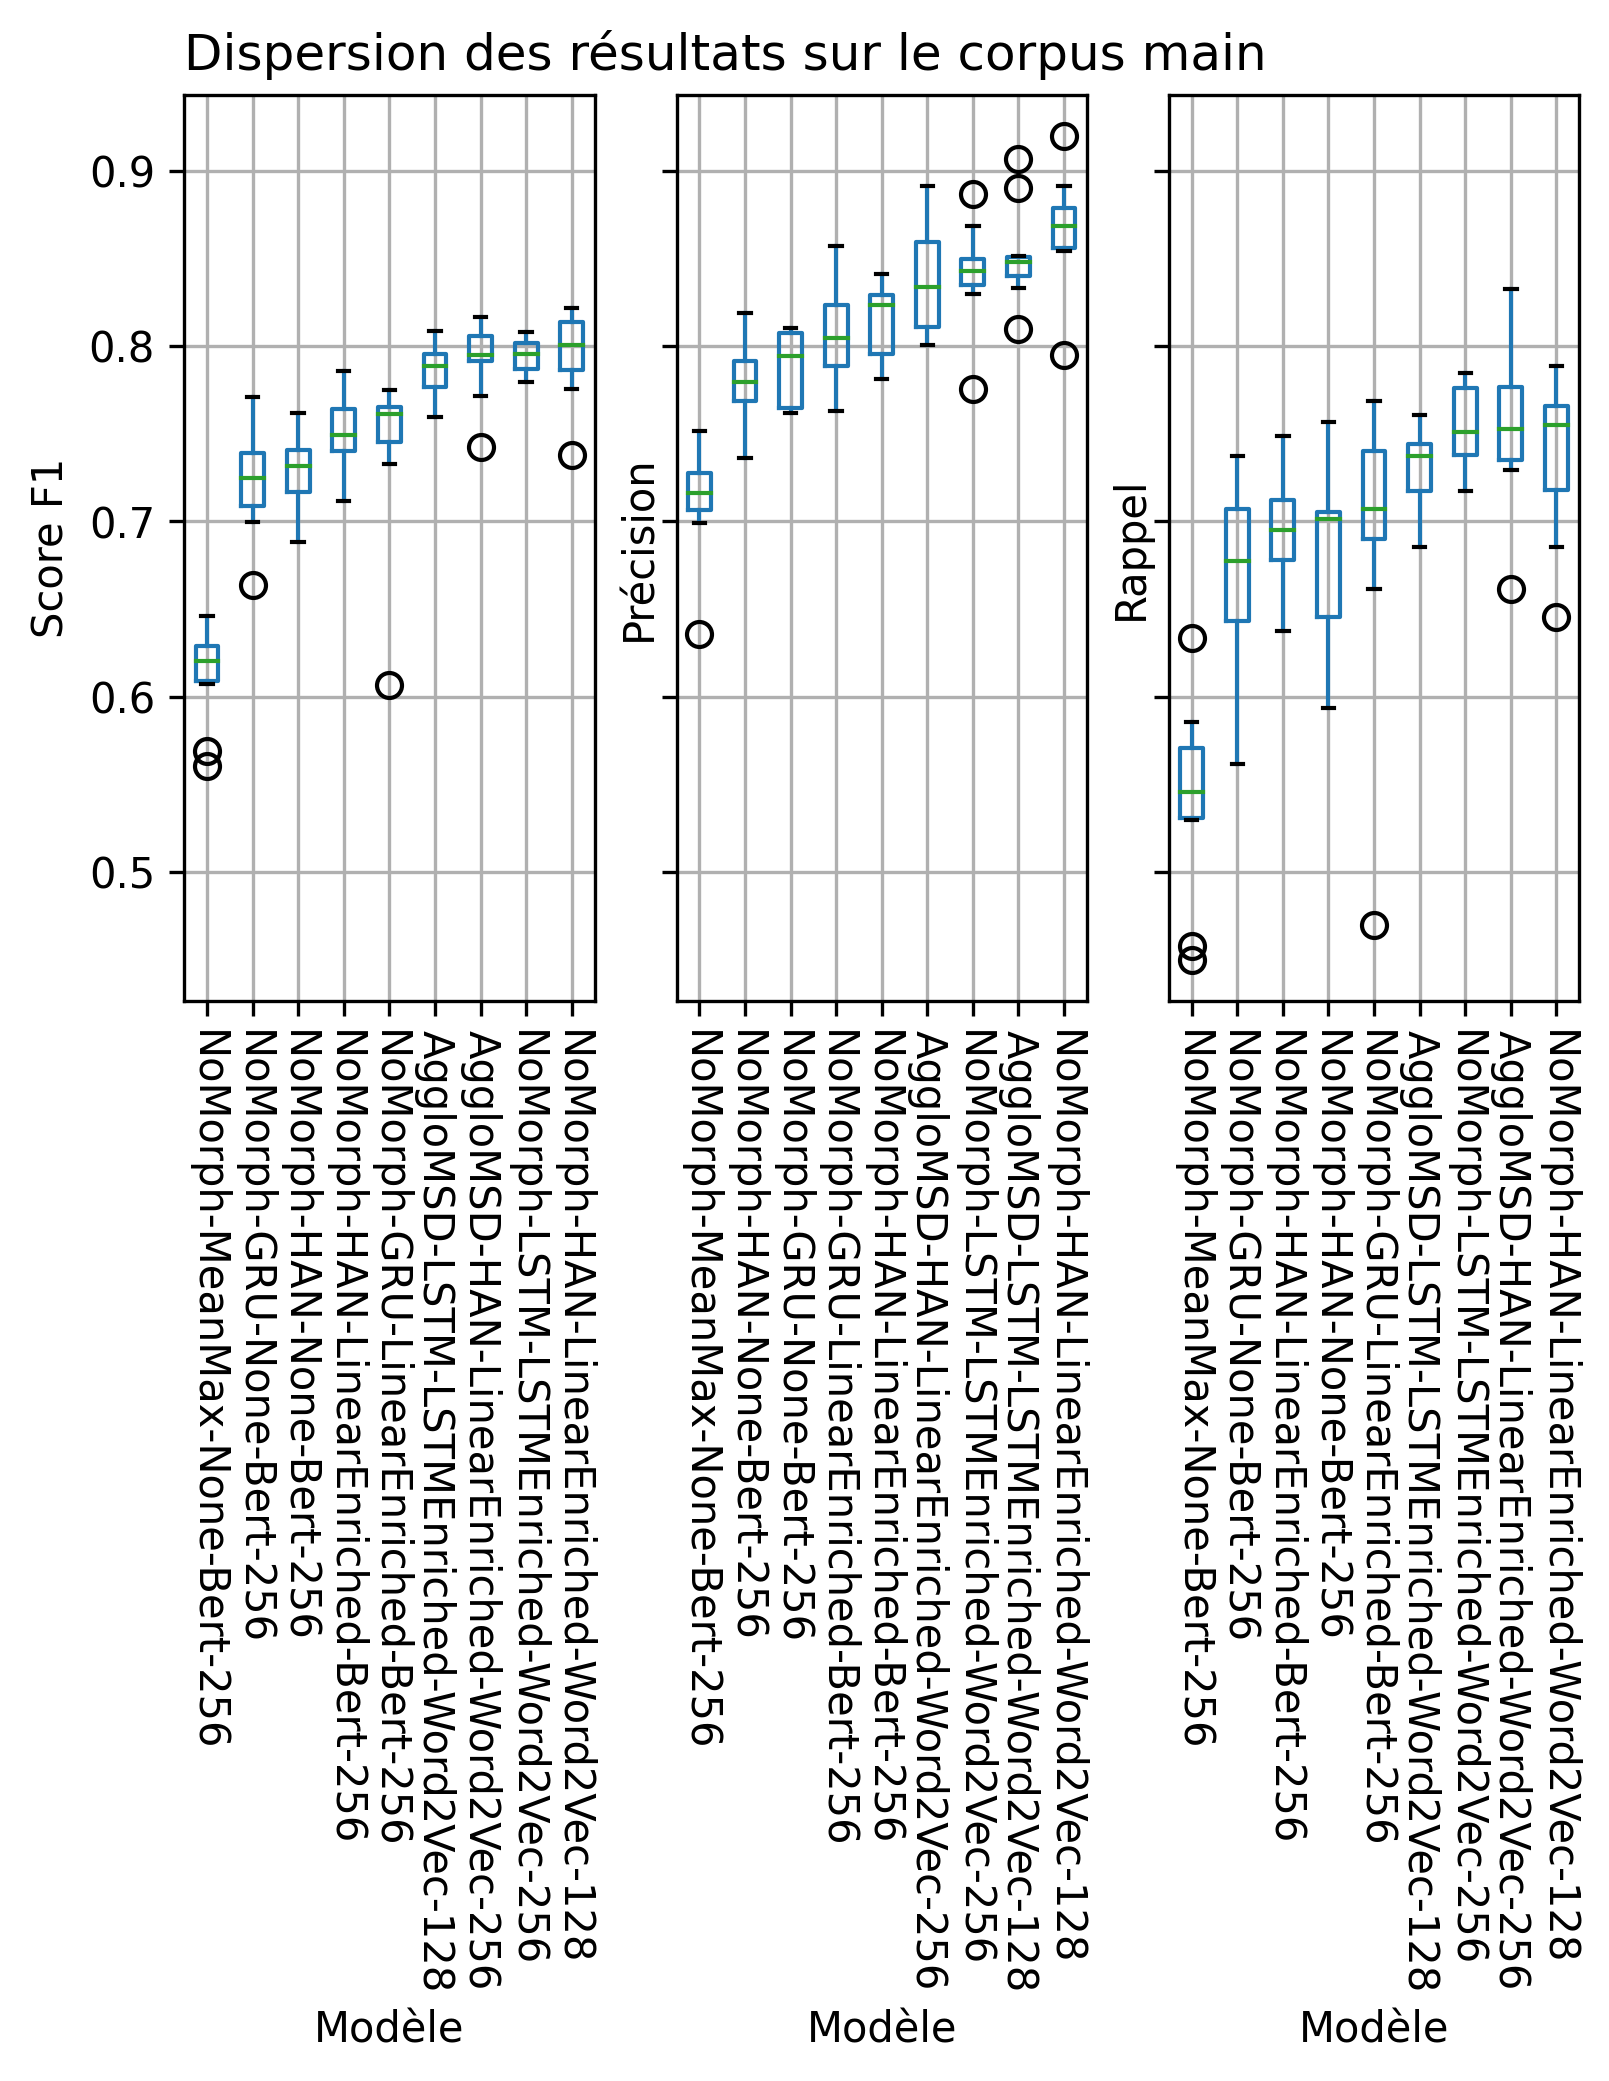

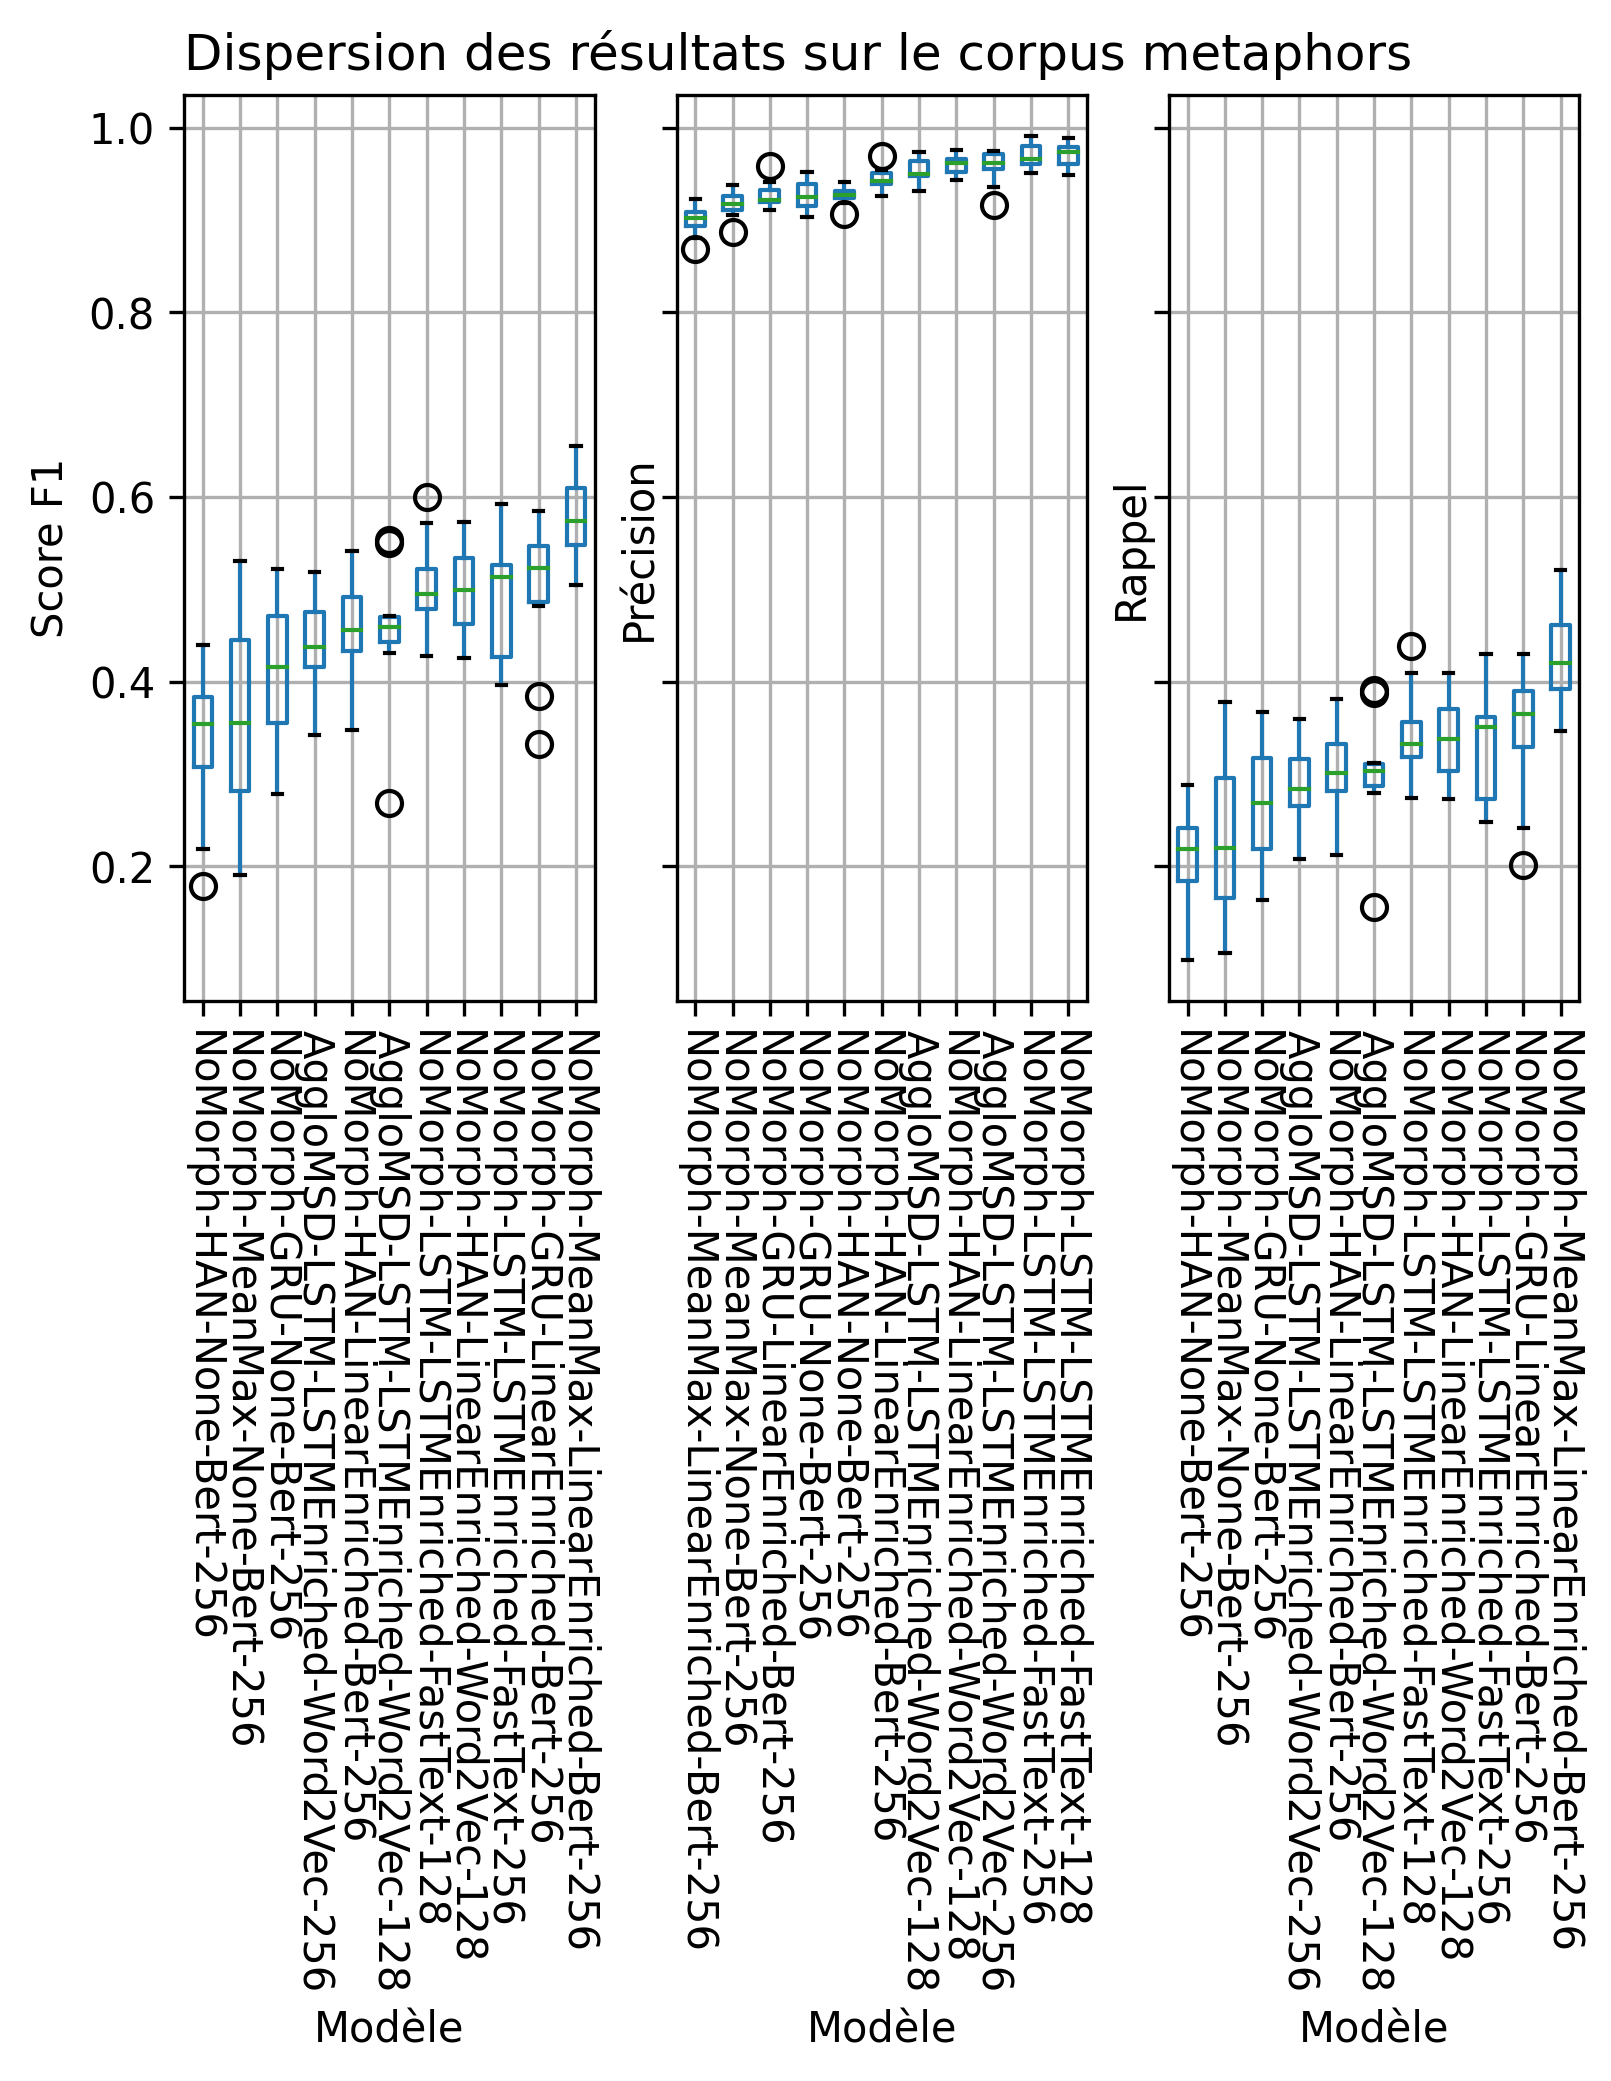

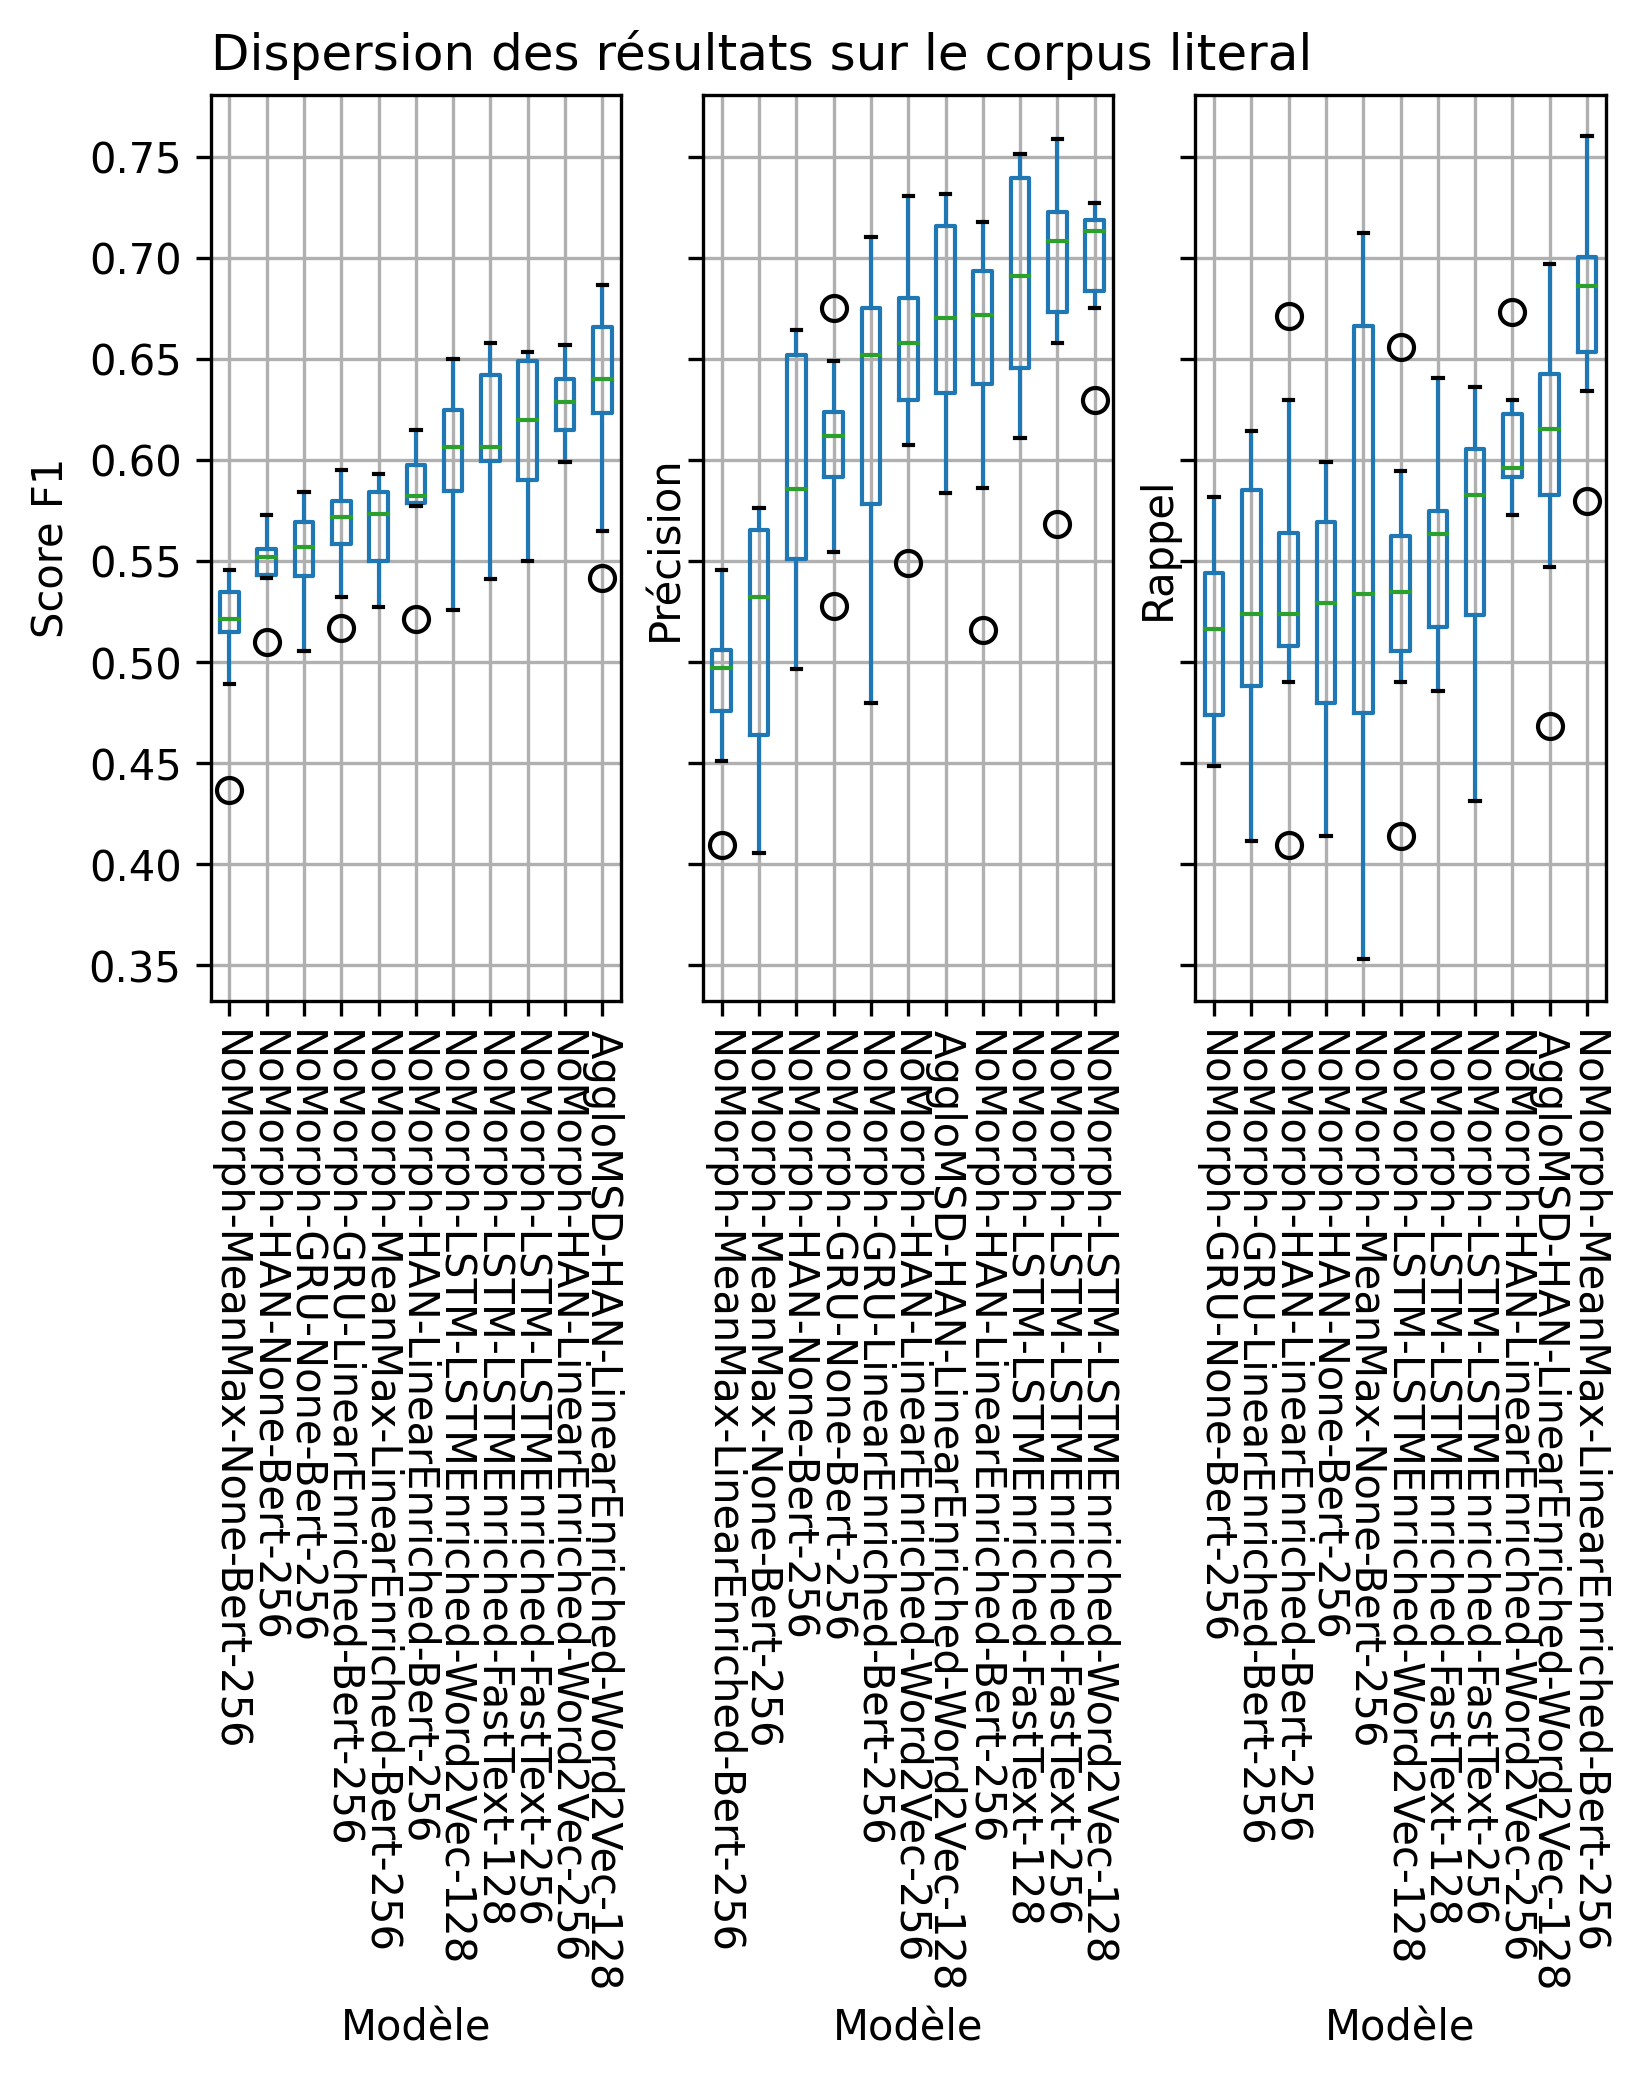

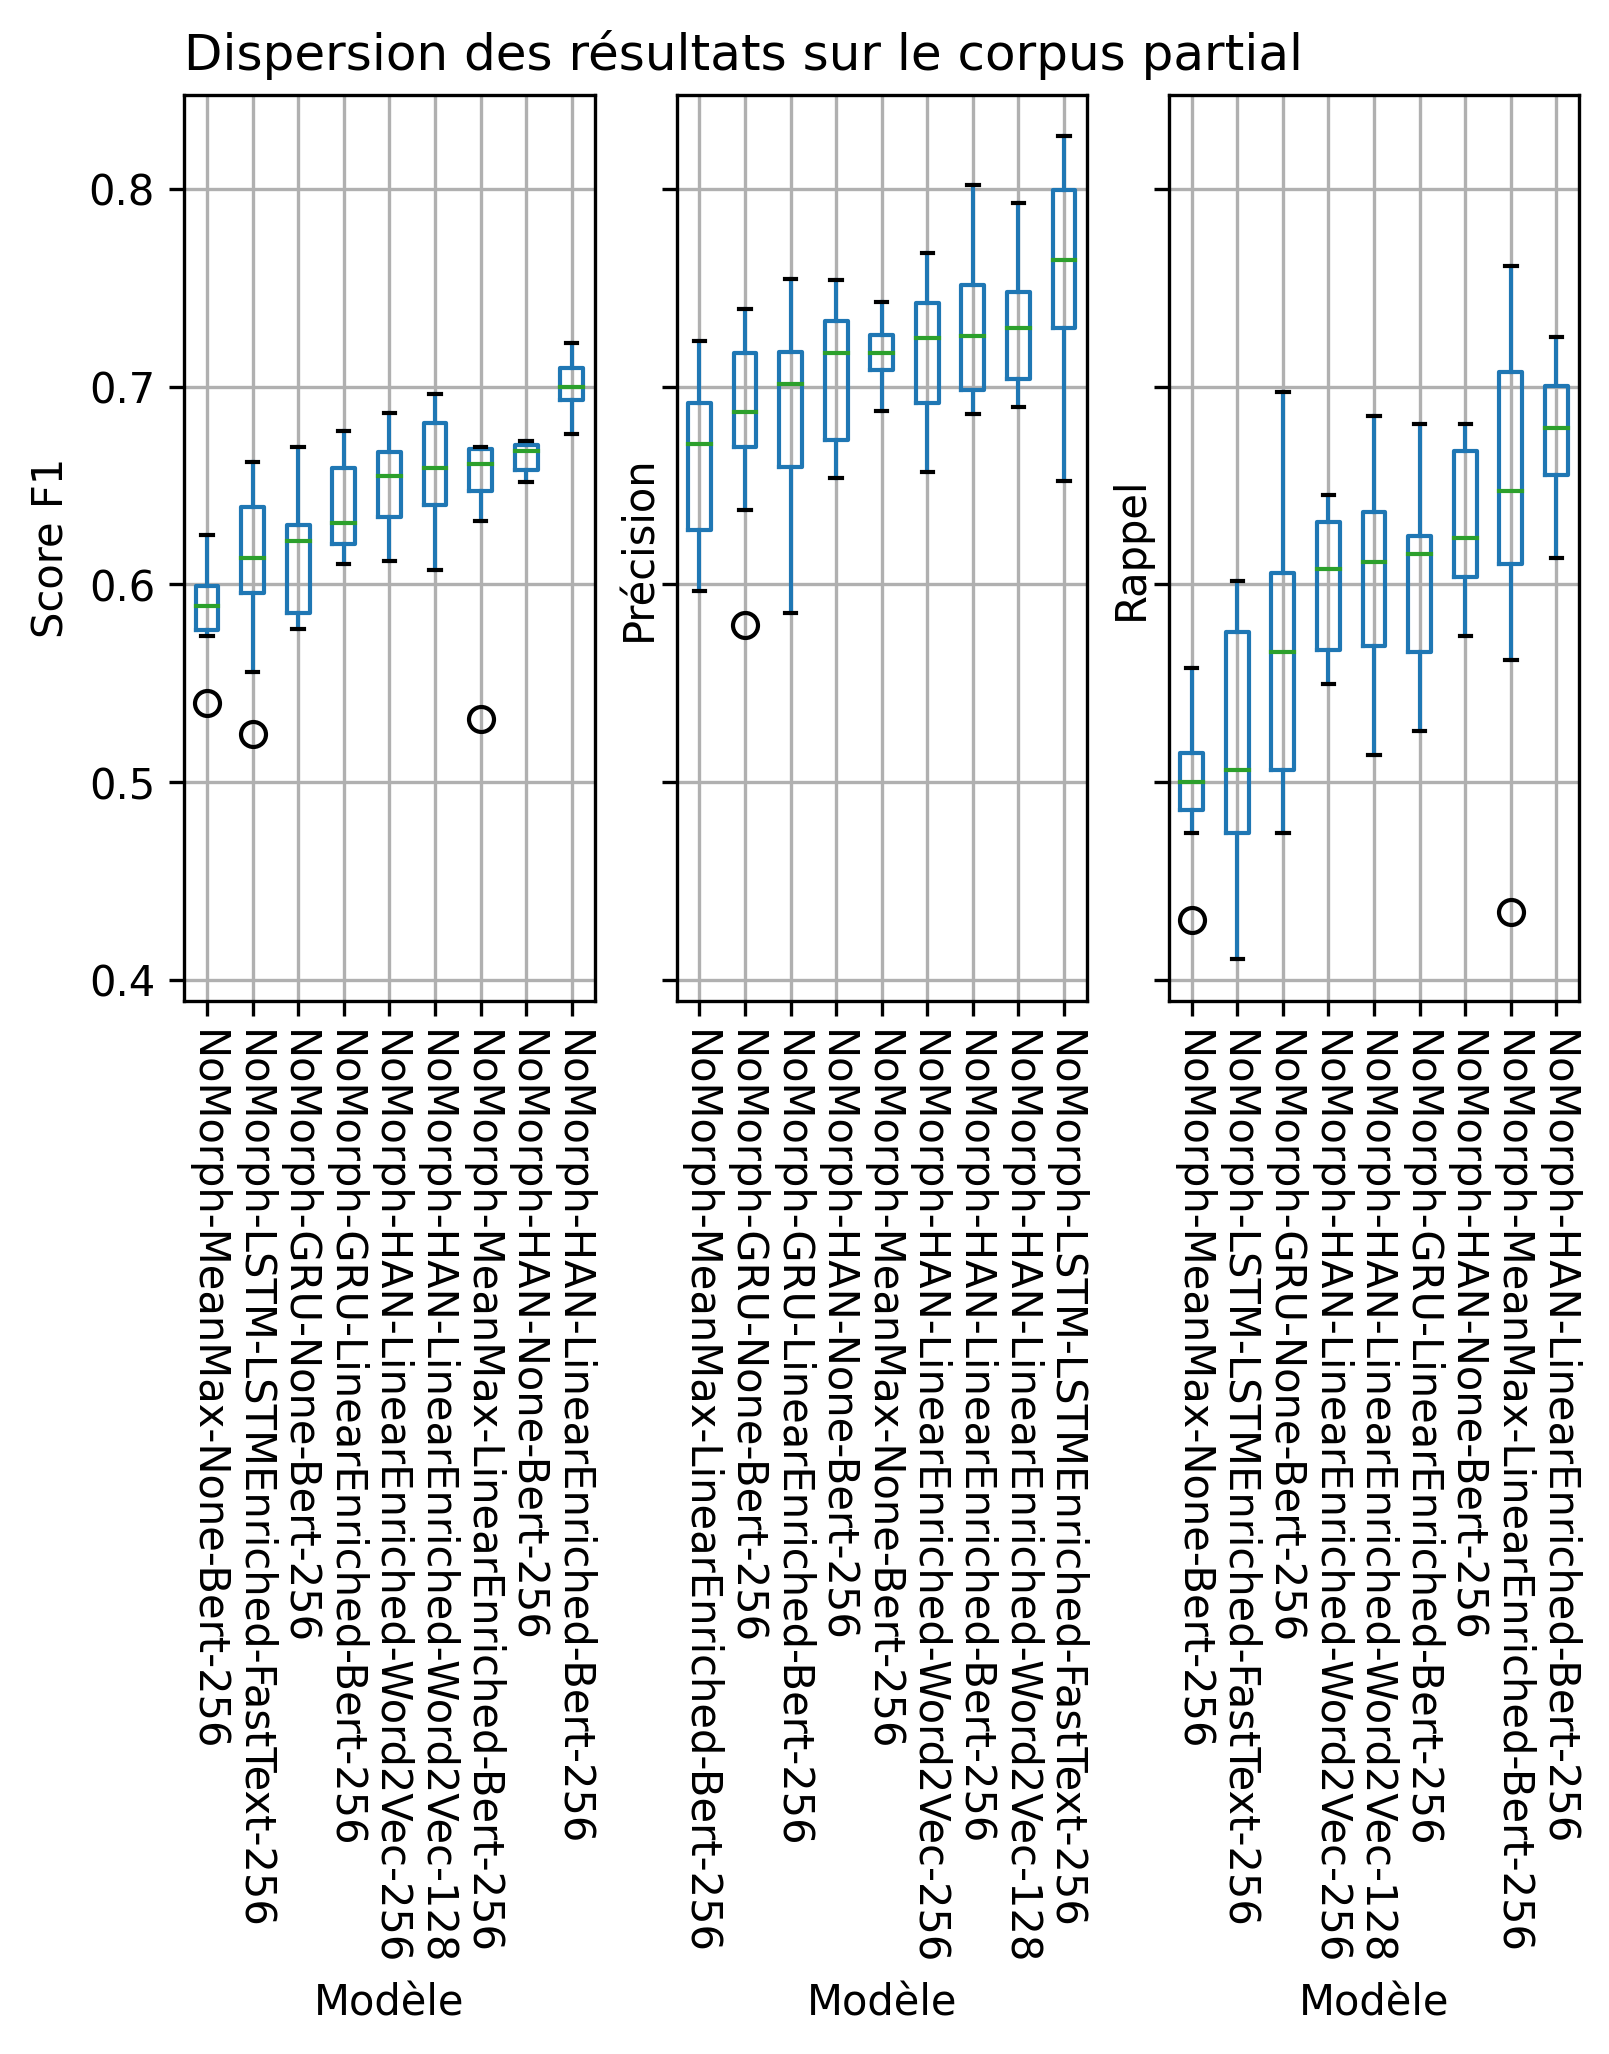

In [4]:
import matplotlib.pyplot as plt

def boxplot_sorted(df, by, column, rot=0, ax=None):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes", ax=ax)


def plot_show(_df, key, legend, _corpus):
    fig, axes = plt.subplots(ncols=3, nrows=1, dpi=300, sharey=True)
    
    i = 0
    for ax, (legend, key) in zip(axes, [
        ("Score F1", "fscore-positive"),
        ("Précision", "precision-positive"),
        ("Rappel", "recall-positive"),
    ]):
        if i == 0:
            ax.set_title(f'Dispersion des résultats sur le corpus {_corpus}', loc="left")
            i = 1
        axes = boxplot_sorted(
            df=_df[_df.Corpus == _corpus], by="name", column=key, ax=ax
        )
        ax.set_xlabel('Modèle')
        ax.set_ylabel(legend)
        #plt.suptitle('')
        ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=-90) 
    plt.show()
    
for corpus in list(df.Corpus.unique()):
    #display(HTML(f"<h2>Results for {corpus}</h2>"))
    #display(HTML(
    #    df[df.Corpus == corpus].groupby(df.name)[
    #        ["precision-positive", "fscore-positive", "recall-positive"]
    #    ].describe().transpose().to_html()
    #))
    plot_show(
        _df=df,
        _corpus=corpus,
        key="precision-positive",
        legend="Précision(Positive)"
    )